**Data Science Problem : Employee Attrition Prediction**

First import the basic libraries to read the dataset, display basic information and statistics and also to perform data analysis using visualization

In [21]:
# import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the Employee Dataset using pandas libary

In [22]:
# read the dataset and store in a variable named data
data=pd.read_csv('/content/Employee.csv')

Display the top 5 rows of the dataset

In [23]:
# to display the head of the dataset
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [24]:
# to display the shape of the dataset
data.shape

(74498, 24)

74498 instances and 24 features

**DATA UNDERSTANDING**

Basic Information of the dataset

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

The given dataset has 74498 rows, 24 columns.

**16 features of object datatype, 6 features of integer datatype and 2 features of float datatype.**

A cursory glance tells that this dataset is of employee work related features that give insight into the Demographics, Education, Salary , Job role parameters and dependencies to predict the attrition of the employee.

Target Variable in the dataset is **Attrition**

**Statistical summary of the dataset**

In [26]:
# display the statistical summary
data.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74493.000000,74498.000000,74492.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832978,49.991584,1.650365,55.727456
std,21505.864514,12.083456,11.223744,2152.508566,0.995303,28.513611,1.553660,25.399349
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


Summary shows the mean, count, min and max values of the numerical features in the dataset.

Total count is same for the numerical features.

**Employee ID:** values range from 1 to 74498

**Age:** Min age of employee is 18years and max is 59years

**Years at Company:** Values ranging from minimum of 1 year to 51 years in the company. On an average employees have worked for 15years.

**Monthly Income**: ranging from 1226 to 16149. The currency is not given (assuming it to be in dollars).

**Number of Promotions**:  There are employees who have earned upto 4 promotions

**Distance from home:** Average distance from home is 49.99 ( metric is not known - can be kms/miles )

**Number of Dependents:** Employees who have upto 6 dependents in their family

**Company Tenure:** Employees who have worked in Companies having tenure from 2 years to 128 years.



**DATA PREPROCESSING**

Next will study each feature and handle the missing value and outliers

**Check for null values**

In [27]:
data.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

There are very few missing values which can be handled. Features with missing values are:

Work-Life Balance, Performance Rating , Number of Promotions , Education Level, Marital Status, Number of Dependents, Job Level, Company Size, Remote Work and Employee Recognition

In [28]:
# to display only the columns with missing values
for j in data.columns:
  if data[j].isnull().sum()>0:
    print(j)

Work-Life Balance
Performance Rating
Number of Promotions
Education Level
Marital Status
Number of Dependents
Job Level
Company Size
Remote Work
Employee Recognition


Will handle missing values for above features one by one

Check for value counts in the above features that have missing values

In [34]:
# using a new variable to include the columns with missing values
missing_value_cols=[ 'Work-Life Balance', 'Performance Rating', 'Number of Promotions', 'Education Level', 'Marital Status', 'Number of Dependents', 'Job Level', 'Company Size', 'Remote Work', 'Employee Recognition']

In [39]:
# display all the value counts in the mentioned features
for i in missing_value_cols:
  print('The value counts in ',data[i].value_counts(),'\n')

The value counts in  Work-Life Balance
Good         28157
Fair         22528
Excellent    13431
Poor         10378
Name: count, dtype: int64 

The value counts in  Performance Rating
Average          44716
High             14910
Below Average    11139
Low               3729
Name: count, dtype: int64 

The value counts in  Number of Promotions
0.0    37141
1.0    18680
2.0    13634
3.0     4049
4.0      989
Name: count, dtype: int64 

The value counts in  Education Level
Bachelor’s Degree    22331
Associate Degree     18648
Master’s Degree      15019
High School          14679
PhD                   3816
Name: count, dtype: int64 

The value counts in  Marital Status
Married     37417
Single      25999
Divorced    11078
Name: count, dtype: int64 

The value counts in  Number of Dependents
0.0    22256
1.0    19329
2.0    11116
3.0    10374
4.0     7620
5.0     3006
6.0      791
Name: count, dtype: int64 

The value counts in  Job Level
Entry     29778
Mid       29676
Senior    15039
Name

Will impute the missing values in above categorical features using mode

In [40]:
data['Work-Life Balance'].fillna(data['Work-Life Balance'].mode()[0],inplace=True)
data['Performance Rating'].fillna(data['Performance Rating'].mode()[0],inplace=True)
data['Education Level'].fillna(data['Education Level'].mode()[0],inplace=True)
data['Marital Status'].fillna(data['Marital Status'].mode()[0],inplace=True)
data['Job Level'].fillna(data['Job Level'].mode()[0],inplace=True)
data['Company Size'].fillna(data['Company Size'].mode()[0],inplace=True)
data['Remote Work'].fillna(data['Remote Work'].mode()[0],inplace=True)
data['Employee Recognition'].fillna(data['Employee Recognition'].mode()[0],inplace=True)

For the numerical features , missing values can be imputed using median

In [42]:
data['Number of Promotions'].fillna(data['Number of Promotions'].median(),inplace=True)
data['Number of Dependents'].fillna(data['Number of Dependents'].median(),inplace=True)

In [43]:
# check for any missing values in dataset
data.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

No missing values are present.

Will check for any **outliers** present in the dataset using a boxplot

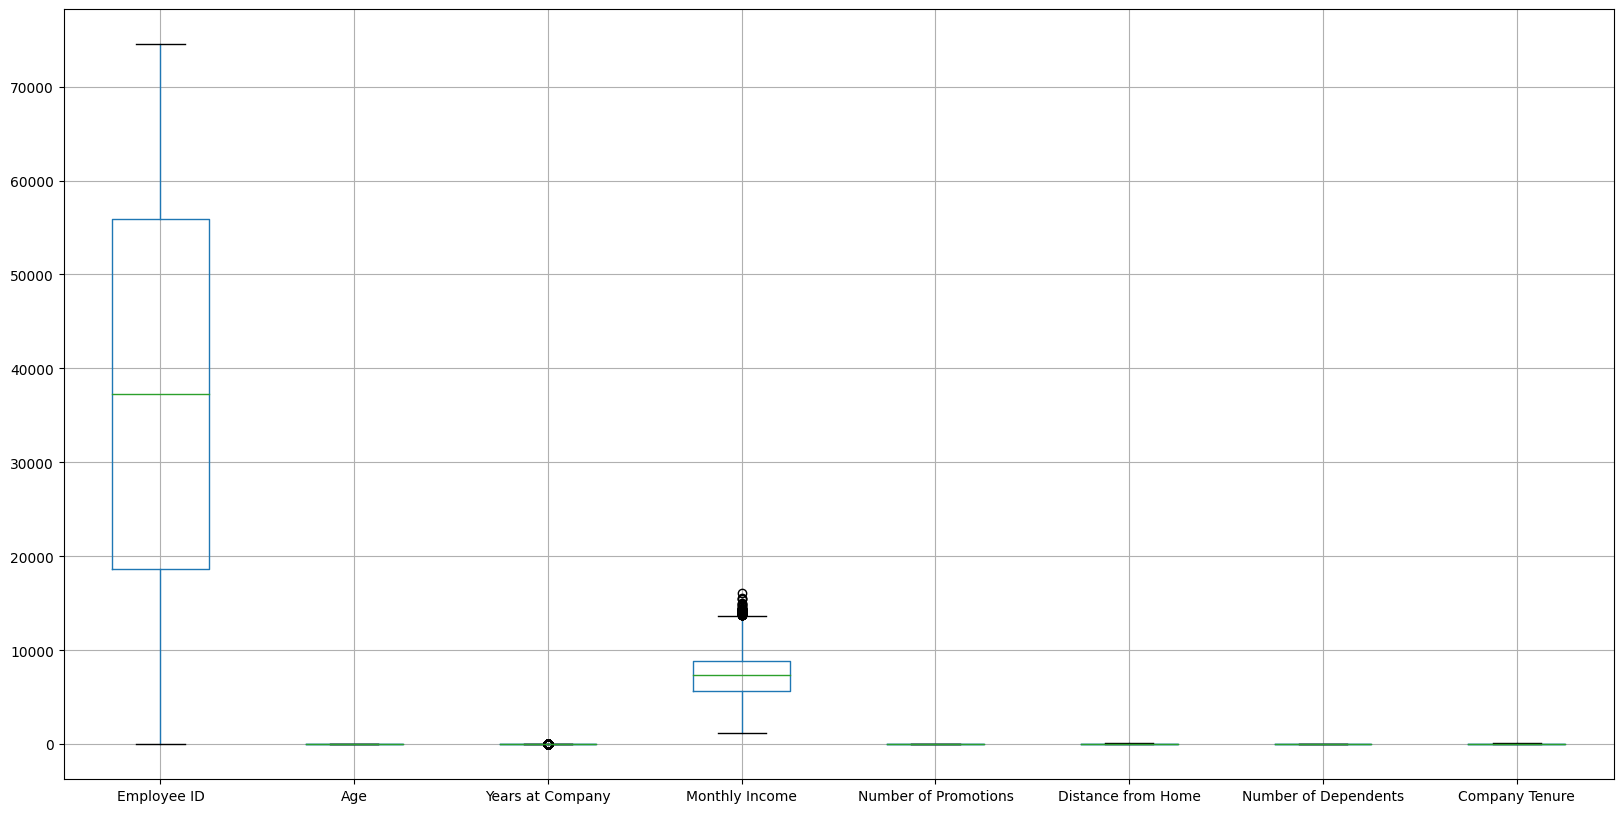

In [45]:
#using boxplot to display the outliers in the dataset
data.boxplot(figsize=(20,10))
plt.show()

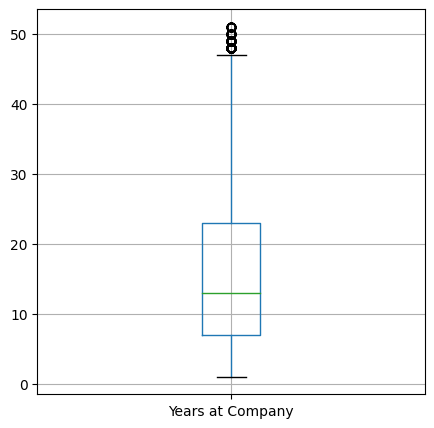

In [49]:
data[['Years at Company']].boxplot(figsize=(5,5))
plt.show()

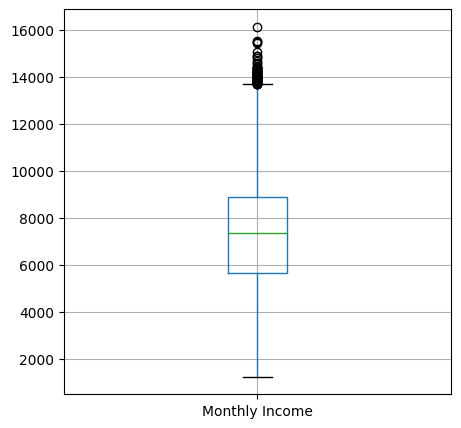

In [50]:
data[['Monthly Income']].boxplot(figsize=(5,5))
plt.show()

The Boxplot of the dataset showed only 2 features having outliers - Years at Company and Monthly Income

Before treating for outliers will check for the correlation among features

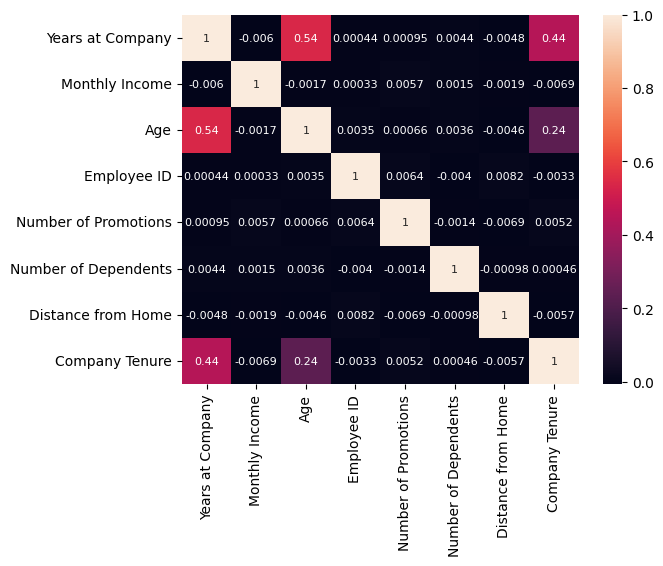

In [59]:
num_cols=['Years at Company','Monthly Income','Age','Employee ID','Number of Promotions','Number of Dependents','Distance from Home','Company Tenure']
sns.heatmap(data[num_cols].corr(),annot=True,annot_kws={'size':8})
plt.show()

Positive Correlation is between :

Years at Company and Age ,
Company Tenure and Years at Company ,
Age and Company Tenure

Will check if employee ID is relevant for the prediction

In [60]:
data['Employee ID'].nunique()

74498

Employee ID has all unique numbers and hence will drop this column as it is not relevant for the prediction

In [62]:
data.drop('Employee ID',inplace=True,axis=1)

Will check for the correlation once again after dropping Employee ID

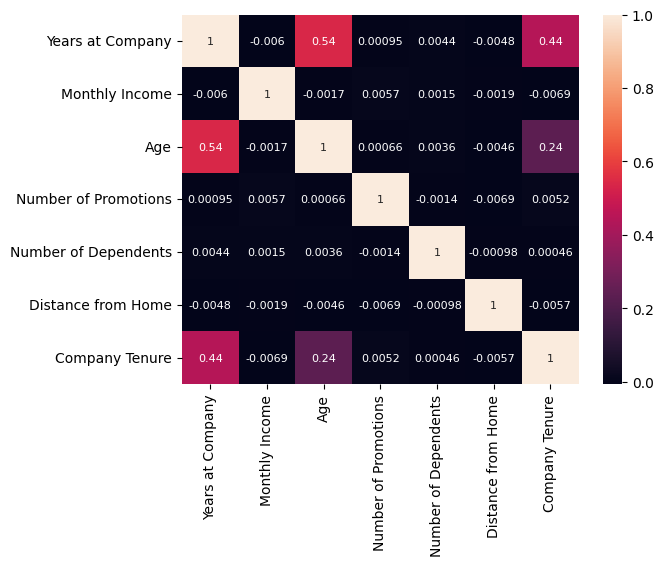

In [63]:
num_cols=['Years at Company','Monthly Income','Age','Number of Promotions','Number of Dependents','Distance from Home','Company Tenure']
sns.heatmap(data[num_cols].corr(),annot=True,annot_kws={'size':8})
plt.show()

As seen earlier, there is very less correlation among most features and not a high correlation

There is a positive correlation of 0.54 among Age and Years at Company

0.44 positive correlation between company tenure and Years at company

0.24 postive correlation between age and company tenure

**Exploratory Data Analysis**

To check the skewness of numerical features

In [68]:
# to display the skewness
data[['Years at Company','Monthly Income','Age','Number of Promotions','Number of Dependents','Distance from Home','Company Tenure']].skew()

Years at Company        0.789908
Monthly Income          0.118312
Age                    -0.001608
Number of Promotions    0.992719
Number of Dependents    0.707200
Distance from Home      0.001765
Company Tenure          0.065670
dtype: float64

Data is skewed and also seen in the histogram below

**Univariant Analyis using Histogram** - shows the distribution of data

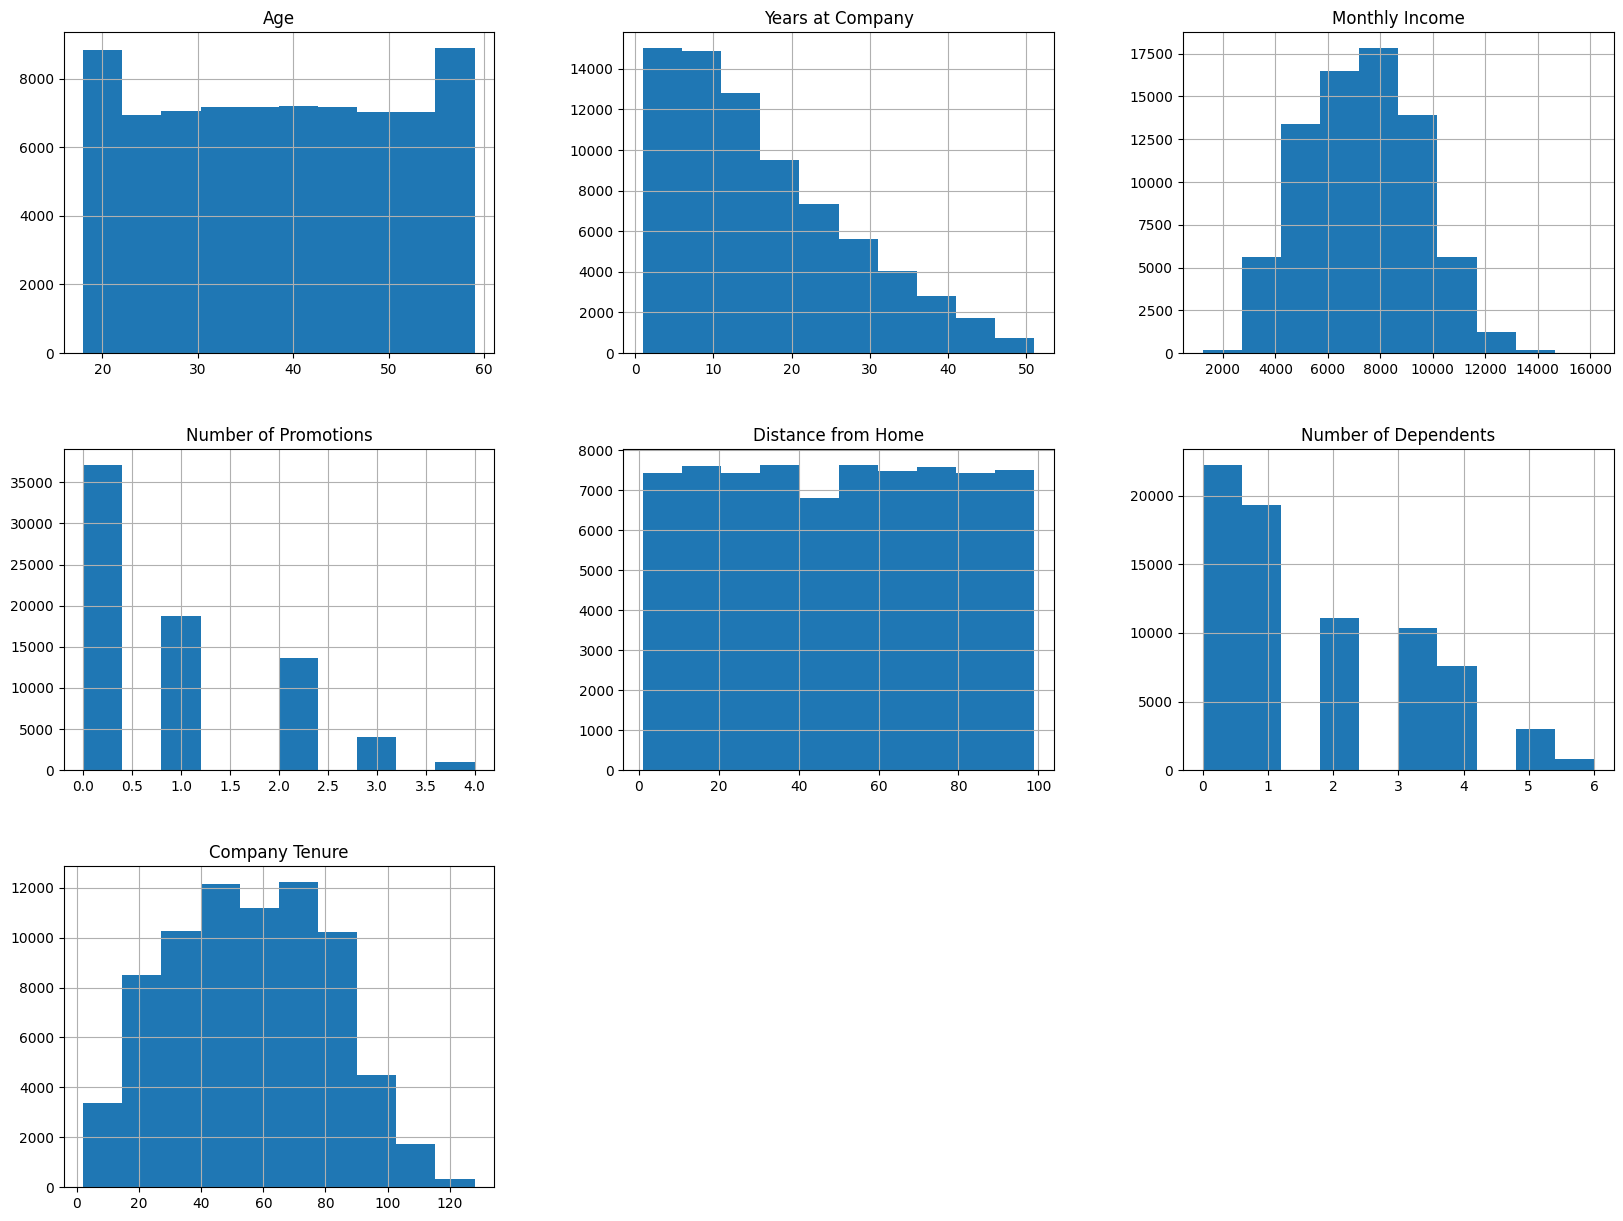

In [65]:
data.hist(figsize=(20,15))
plt.show()

**Bivariant Analysis of Numerical features** with Target Variable

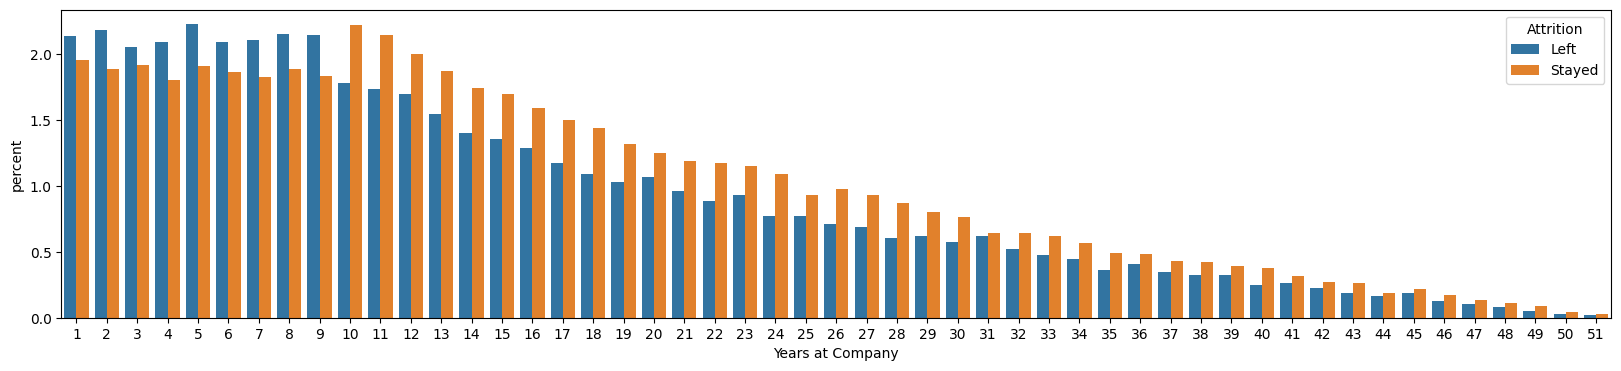

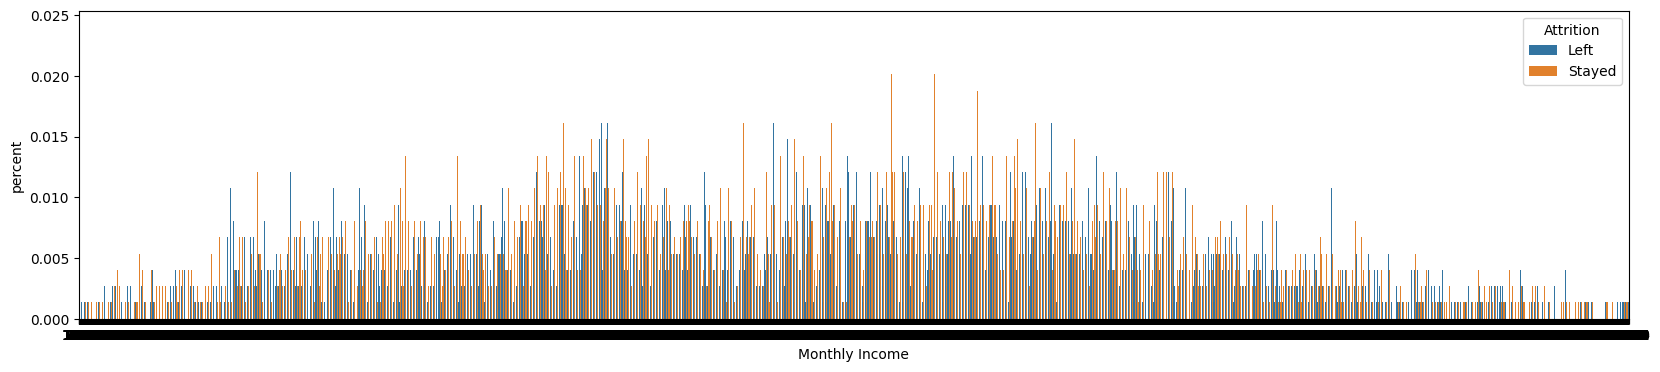

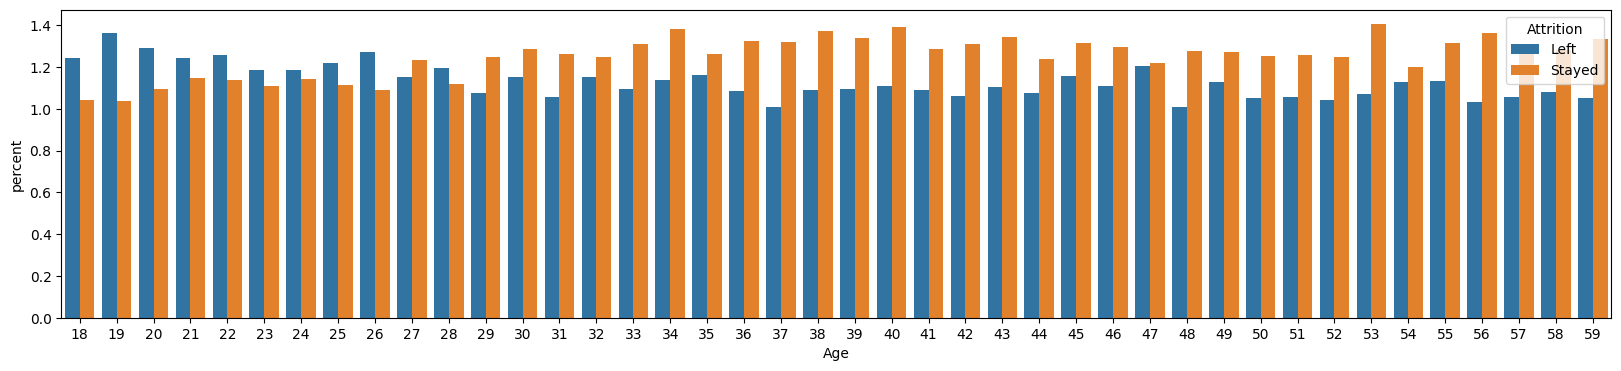

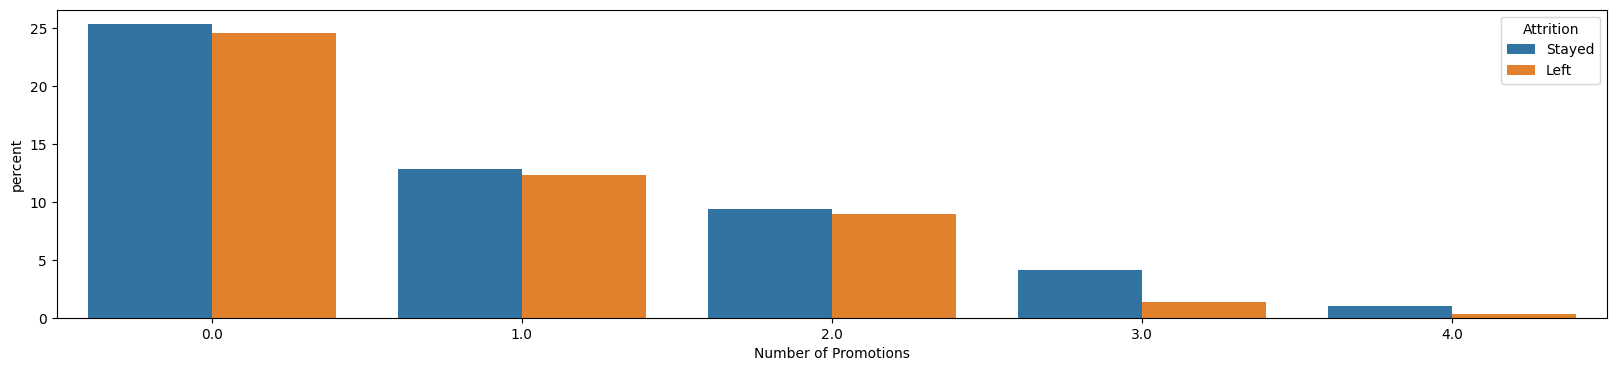

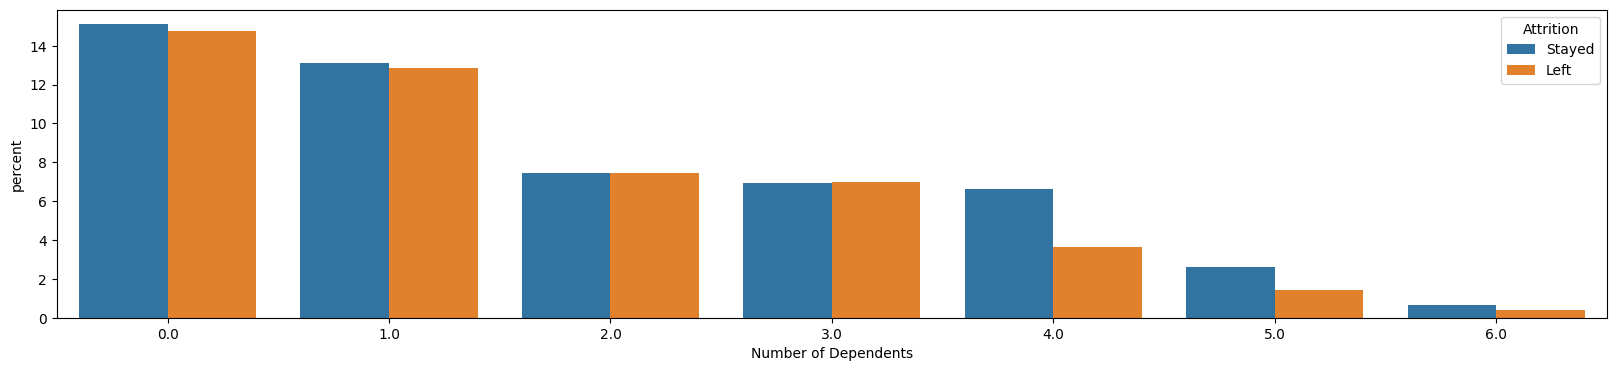

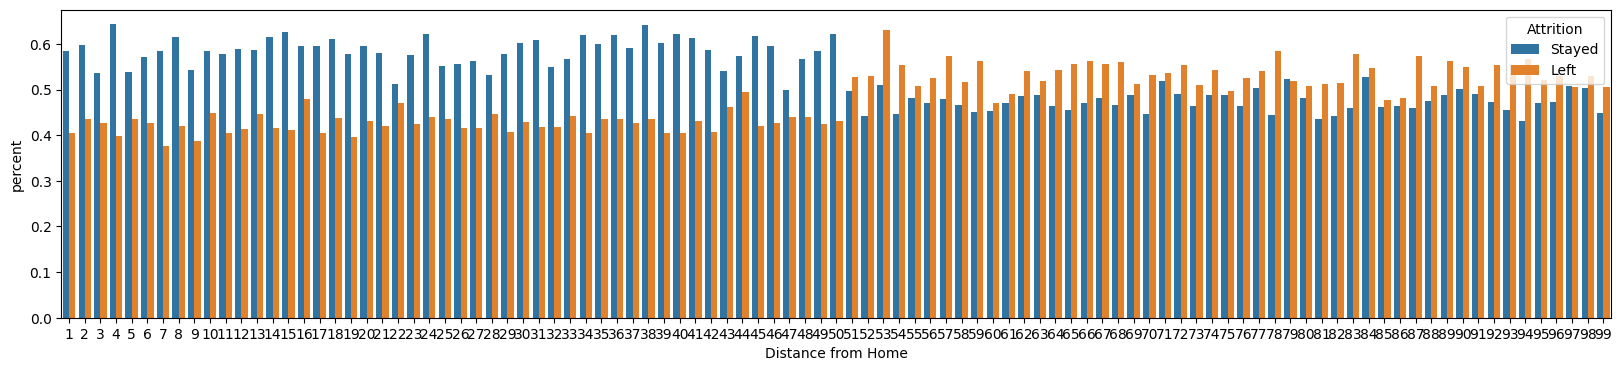

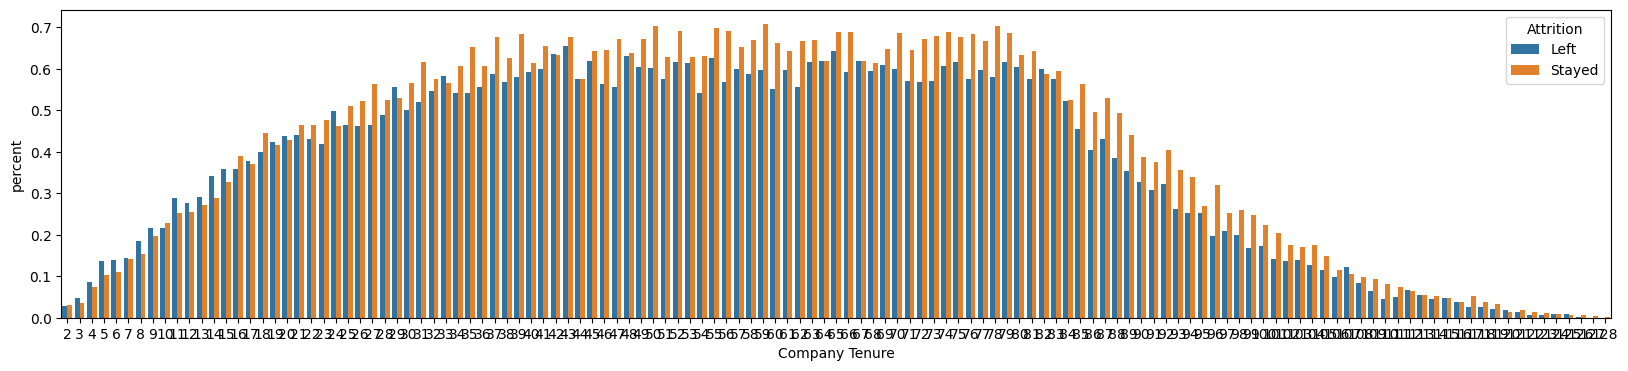

In [71]:
for col in num_cols:
    plt.figure(figsize = (20, 4))
    sns.countplot(x=data[col], data = data,hue='Attrition', stat='percent')
    plt.show()

Displays the percentage of count of features related to Attrition.

Some of the Observations:

**Those spent upto 9 years in the company, % of those who left was more than those employees who stayed. While those who spent more than 10 years in the company , employees who stayed in the company is more than those who left. **

*Employees of age 27 and above 29 stayed in the company. Below age of 27 , saw more percentage leaving the company*

*More the promotions and more the dependents employees stayed with the company*




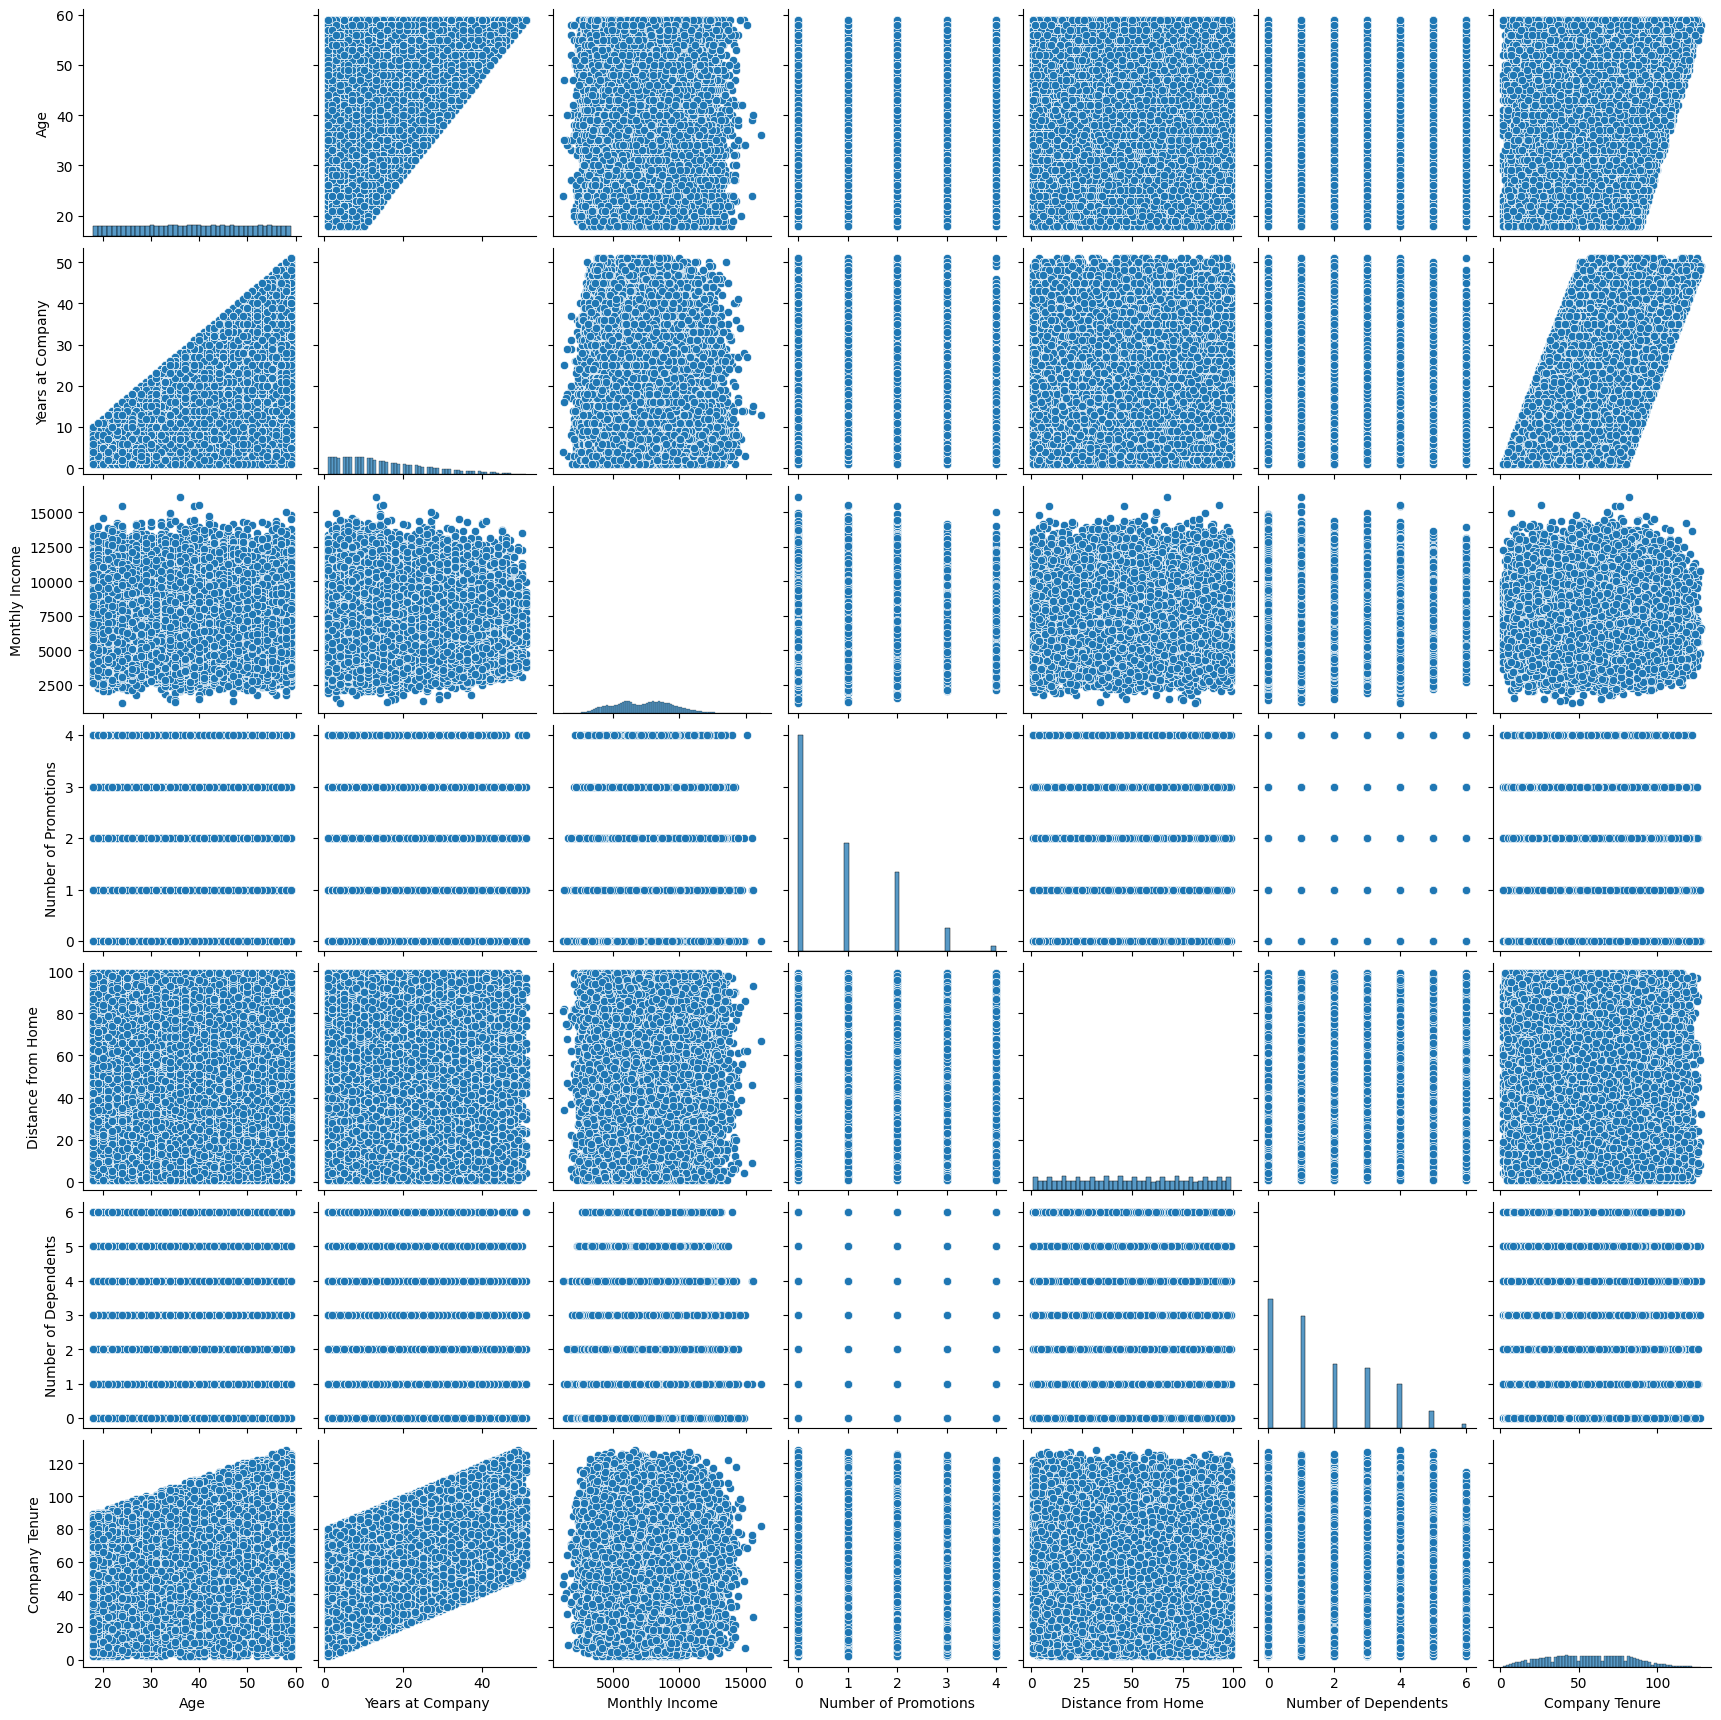

In [72]:
sns.pairplot(data)
plt.show()

Pairplot shows the complete distribution of numerical features in the dataset

**Handling Outliers using IQR method**

In [73]:
num_cols_outliers= ['Years at Company','Monthly Income']

There are outliers only in 2 features

In [75]:
for i in num_cols_outliers:
    Q1=np.percentile(data[i],25,method='midpoint')
    Q2=np.percentile(data[i],50,method='midpoint')
    Q3=np.percentile(data[i],75,method='midpoint')
    IQR = Q3-Q1
    low_lim = Q1-1.5*IQR
    up_lim = Q3+1.5*IQR

    outliers = []
    for h in data[i]:
        if ((h < low_lim) | (h > up_lim)):
            outliers.append(h)
    data[i]=data[i].clip(lower=low_lim,upper=up_lim)

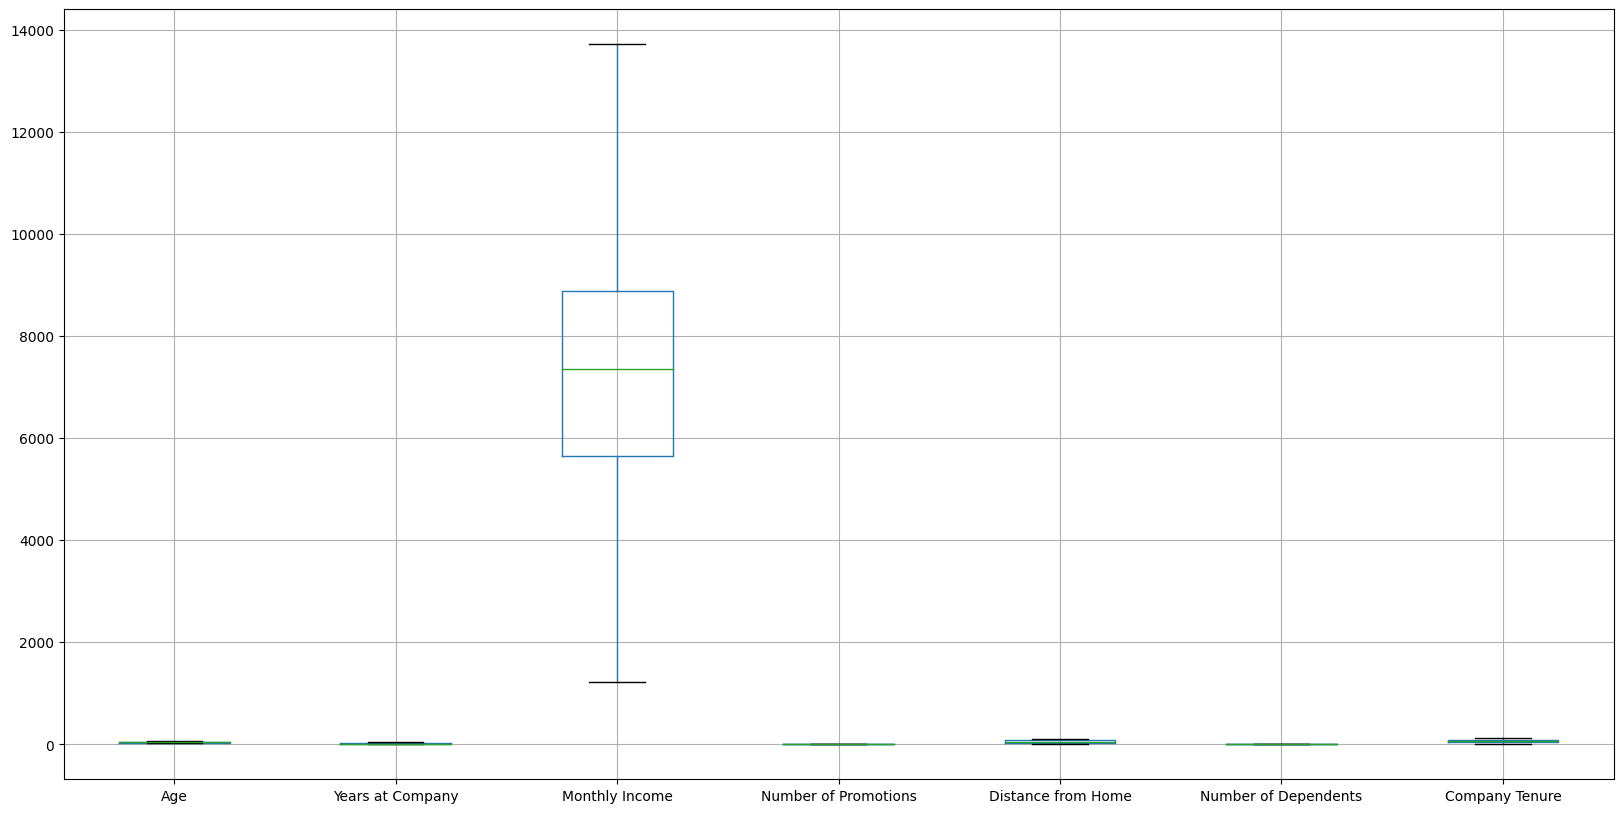

In [76]:
data.boxplot(figsize=(20,10))
plt.show()

There are no outliers and hence proceding for Modelling.

All the features seem relevant although the correlation is weak.

Before Modeling : need to encode the categorical data using Label Encoder

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       74498 non-null  int64  
 1   Gender                    74498 non-null  object 
 2   Years at Company          74498 non-null  int64  
 3   Job Role                  74498 non-null  object 
 4   Monthly Income            74498 non-null  int64  
 5   Work-Life Balance         74498 non-null  object 
 6   Job Satisfaction          74498 non-null  object 
 7   Performance Rating        74498 non-null  object 
 8   Number of Promotions      74498 non-null  float64
 9   Overtime                  74498 non-null  object 
 10  Distance from Home        74498 non-null  int64  
 11  Education Level           74498 non-null  object 
 12  Marital Status            74498 non-null  object 
 13  Number of Dependents      74498 non-null  float64
 14  Job Le

In [81]:
data['Attrition'].value_counts()

Attrition
Stayed    39128
Left      35370
Name: count, dtype: int64

In [80]:
data.columns

Index(['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income',
       'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
       'Number of Promotions', 'Overtime', 'Distance from Home',
       'Education Level', 'Marital Status', 'Number of Dependents',
       'Job Level', 'Company Size', 'Company Tenure', 'Remote Work',
       'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [82]:
cat_cols=['Gender', 'Job Role','Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
       'Overtime', 'Education Level', 'Marital Status','Job Level', 'Company Size', 'Remote Work',
       'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition','Attrition']

In [83]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_cols:
  data[i]=le.fit_transform(data[i])

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       74498 non-null  int64  
 1   Gender                    74498 non-null  int64  
 2   Years at Company          74498 non-null  int64  
 3   Job Role                  74498 non-null  int64  
 4   Monthly Income            74498 non-null  int64  
 5   Work-Life Balance         74498 non-null  int64  
 6   Job Satisfaction          74498 non-null  int64  
 7   Performance Rating        74498 non-null  int64  
 8   Number of Promotions      74498 non-null  float64
 9   Overtime                  74498 non-null  int64  
 10  Distance from Home        74498 non-null  int64  
 11  Education Level           74498 non-null  int64  
 12  Marital Status            74498 non-null  int64  
 13  Number of Dependents      74498 non-null  float64
 14  Job Le

In [85]:
data['Attrition'].value_counts()

Attrition
1    39128
0    35370
Name: count, dtype: int64

**Attrition - Stayed is encoded 1 and Left is encoded 0**

All categorical features have now been encoded

**Next Step is scaling using Standard Scaler**

Before Scaling the data is ready for Modelling. Split the data into dependent and independent variables

In [86]:
X=data.drop('Attrition',axis=1)
y=data['Attrition']

Using train test split for modeling with a test size of .25

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

Using Standard Scaler for scaling the data

In [88]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(X_train)
x_test=sc.fit_transform(X_test)

x_train=pd.DataFrame(x_train,columns=X.columns)
x_test=pd.DataFrame(x_test,columns=X.columns)

**Dataset is encoded and Scaled for Modelling **

Modeling using Logistic Regression, SVM and Random Forest using parameters and fine tuning.

Import the necessary libraries and also the evaluation metrics

**Logistic Regression**

In [90]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
logpred=logreg.predict(x_test)

In [91]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
confusion_matrix(y_test,logpred)

array([[6190, 2681],
       [2554, 7200]])

In [92]:
print('Accuracy:',accuracy_score(y_test,logpred))
print('Precision:',precision_score(y_test,logpred))
print('Recall:',recall_score(y_test,logpred))
print('F1:',f1_score(y_test,logpred))

Accuracy: 0.7189261744966443
Precision: 0.728671187126809
Recall: 0.7381587041213861
F1: 0.7333842627960276


In [94]:
classification_extra = (classification_report(y_test, logpred))
print(classification_extra)

              precision    recall  f1-score   support

           0       0.71      0.70      0.70      8871
           1       0.73      0.74      0.73      9754

    accuracy                           0.72     18625
   macro avg       0.72      0.72      0.72     18625
weighted avg       0.72      0.72      0.72     18625



In [95]:
log_reg=LogisticRegression(max_iter=100,random_state=91)
log_reg.fit(x_train,y_train)
log_pred=logreg.predict(x_test)

In [96]:
print('Accuracy:',accuracy_score(y_test,log_pred))
print('Precision:',precision_score(y_test,log_pred))
print('Recall:',recall_score(y_test,log_pred))
print('F1:',f1_score(y_test,log_pred))

Accuracy: 0.7189261744966443
Precision: 0.728671187126809
Recall: 0.7381587041213861
F1: 0.7333842627960276


In [97]:
logit = LogisticRegression()
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(logit, param_grid,scoring='roc_auc',cv=5,n_jobs=-1)
clf.fit(x_train,y_train)
logit_pred=clf.predict(x_test)

In [98]:
print('Accuracy:',accuracy_score(y_test,logit_pred))
print('Precision:',precision_score(y_test,logit_pred))
print('Recall:',recall_score(y_test,logit_pred))
print('F1:',f1_score(y_test,logit_pred))

Accuracy: 0.718979865771812
Precision: 0.7285598705501618
Recall: 0.7385687922903424
F1: 0.7335301904083087


Logistic Regression has given an accuracy of 0.718 with no parameters and with parameters and hyper tuning. Same accuracy

**SVM Classifier**

In [99]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
svm = SVC()
svm.fit(x_train, y_train)
y_pred= svm.predict(x_test)

In [100]:
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Precision:',precision_score(y_test,y_pred))
print('Recall:',recall_score(y_test,y_pred))
print('F1:',f1_score(y_test,y_pred))

Accuracy: 0.7377718120805369
Precision: 0.7450684380032206
Recall: 0.7589706786959196
F1: 0.7519553072625698


In [101]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6338 2533]
 [2351 7403]]
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      8871
           1       0.75      0.76      0.75      9754

    accuracy                           0.74     18625
   macro avg       0.74      0.74      0.74     18625
weighted avg       0.74      0.74      0.74     18625



In [104]:
svmrb = SVC(kernel='rbf')
svmrb.fit(x_train, y_train)
y_predrb= svmrb.predict(x_test)

In [105]:
print('Accuracy:',accuracy_score(y_test,y_predrb))
print('Precision:',precision_score(y_test,y_predrb))
print('Recall:',recall_score(y_test,y_predrb))
print('F1:',f1_score(y_test,y_predrb))

Accuracy: 0.7377718120805369
Precision: 0.7450684380032206
Recall: 0.7589706786959196
F1: 0.7519553072625698


SVM without any parameters has given an accuracy of 0.73
With kernel as RBF , the accuracy is 0.7377

**Random Forest Classifier**

In [106]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_predrfc=rfc.predict(x_test)
print("Accuracy : ",accuracy_score(y_test,y_predrfc))
print("recall :",recall_score(y_test,y_predrfc))
print("F1 :",f1_score(y_test,y_predrfc))
print("Precision :",precision_score(y_test,y_predrfc))
print("Confusion matrix : ",confusion_matrix(y_test,y_predrfc))

Accuracy :  0.7471140939597315
recall : 0.7603034652450277
F1 : 0.7589806570463616
Precision : 0.7576624438087454
Confusion matrix :  [[6499 2372]
 [2338 7416]]


In [107]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,max_depth=11,criterion='gini',min_samples_split=3,max_features='log2',random_state=42)
rfc.fit(x_train,y_train)
y_predrfc=rfc.predict(x_test)
print("Accuracy : ",accuracy_score(y_test,y_predrfc))
print("recall :",recall_score(y_test,y_predrfc))
print("F1 :",f1_score(y_test,y_predrfc))
print("Precision :",precision_score(y_test,y_predrfc))
print("Confusion matrix : ",confusion_matrix(y_test,y_predrfc))

Accuracy :  0.7510872483221477
recall : 0.7718884560180439
F1 : 0.7645983548288818
Precision : 0.7574446680080483
Confusion matrix :  [[6460 2411]
 [2225 7529]]


Random Forest Classifier has given an accuracy of 0.74 with no parameters and an accuracy of 0.75 using the hyper parameters

**The best accuracy is obtained using the random forest classifier with an accuracy of 0.75**

Using RandomForest for Prediction by giving feature inputs

In [109]:
y_predrfc

array([1, 1, 1, ..., 1, 0, 1])

In [111]:
x_test.columns

Index(['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income',
       'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
       'Number of Promotions', 'Overtime', 'Distance from Home',
       'Education Level', 'Marital Status', 'Number of Dependents',
       'Job Level', 'Company Size', 'Company Tenure', 'Remote Work',
       'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition'],
      dtype='object')

In [117]:
import warnings
warnings.filterwarnings('ignore')

In [118]:
predicted_value=rfc.predict([[56,1,41,4,4821,2,3,5,2,2,71,2,1,2,2,3,1,4,5,1,3,4]])
print(predicted_value[0])

1


**Prediction is 1 which means the employee has Stayed**